In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
file_path = './data/fra.txt'
lines = pd.read_csv(file_path, names=['eng', 'fra', 'cc'], sep='\t')
print('전체 샘플의 수 :',len(lines))
print(lines.shape)

전체 샘플의 수 : 217975
(217975, 3)


In [3]:
lines = lines[['eng', 'fra']][:33000]
print(lines.shape)
lines.sample(5)

(33000, 2)


,eng,fra
18014,What time is it?,"Il est quelle heure, là ?"
25025,Get on your knees.,Mettez-vous à genoux.
31551,Have you gone nuts?,Es-tu devenu fou ?
20974,I've been robbed.,On m'a volé.
15353,I sent Tom home.,J'ai renvoyé Tom à la maison.


## Step 1. 정제, 정규화, 전처리 (영어, 프랑스어 모두)

In [4]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

__모두 소문자로 변경__

In [5]:
lines['eng'] = lines['eng'].apply(str.lower)
lines['fra'] = lines['fra'].apply(str.lower)

In [6]:
lines.head(10)

,eng,fra
0,go.,va !
1,go.,marche.
2,go.,en route !
3,go.,bouge !
4,hi.,salut !
5,hi.,salut.
6,run!,cours !
7,run!,courez !
8,run!,prenez vos jambes à vos cous !
9,run!,file !


__구분자 앞에 공백 삽입__
* 어퍼스트로피(')와 슬래시(-)는 분리하지 않음.

In [7]:
import re
lines.eng = lines.eng.apply(lambda x : re.sub(r'([?.!,¿])', r' \1', x))
lines.fra = lines.fra.apply(lambda x : re.sub(r'([?.!,¿])', r' \1', x))

In [8]:
lines.eng.sample(10)

24652    crime doesn't pay .
23707     who plays guitar ?
3163           i dozed off .
17898      we're open 24/7 .
3577           i'm touched .
22564     tom doesn't read .
26200    i need a computer .
17600      tom's repulsive .
7487         i contributed .
12461       that's a tower .
Name: eng, dtype: object

In [9]:
lines.fra.sample(10)

21140                              ça semble fonctionner .
26290                            j'ai mis mes chaussures .
1542                                     pas de problème .
13536                                 tu n'es pas grosse .
22280                               ils la firent partir .
27461    occupe-toi de ta vie et laisse vivre les autres .
6372                                tom a fini par céder .
32035                              je vous l'ai déjà dit .
29169                                 tom dormait dehors .
16325                                 fais-le plus petit .
Name: fra, dtype: object

__공백을 기준으로 모든 단어 분리하여 토큰화__

In [10]:
# tok_eng = lines.eng.apply(lambda x : [f"'{word}'" for word in x.split()])

In [11]:
# tok_eng.head(5)

In [12]:
tok_eng = lines.eng.apply(lambda x : x.split())
tok_eng.head(5)

0    [go, .]
1    [go, .]
2    [go, .]
3    [go, .]
4    [hi, .]
Name: eng, dtype: object

In [13]:
# tok_fra = lines.fra.apply(lambda x : [f"'{word}'" for word in x.split()])
# tok_fra.head(5)

In [14]:
tok_fra = lines.fra.apply(lambda x : x.split())
tok_fra.head(5)

0           [va, !]
1       [marche, .]
2    [en, route, !]
3        [bouge, !]
4        [salut, !]
Name: fra, dtype: object

## Step 2. 디코더의 문장에 시작 토큰과 종료 토큰을 넣어주세요.

In [15]:
# fra_input = tok_fra.apply(lambda x : ["'<sos>'"] + x)
# fra_input.head(5)

In [16]:
# fra_label = tok_fra.apply(lambda x : x + ["'<eos>'"])
# fra_label.head(5)

In [17]:
fra_input = tok_fra.apply(lambda x : ['<sos>'] + x)
fra_input.head(5)

0           [<sos>, va, !]
1       [<sos>, marche, .]
2    [<sos>, en, route, !]
3        [<sos>, bouge, !]
4        [<sos>, salut, !]
Name: fra, dtype: object

In [18]:
fra_label = tok_fra.apply(lambda x : x + ['<eos>'])
fra_label.head(5)

0           [va, !, <eos>]
1       [marche, ., <eos>]
2    [en, route, !, <eos>]
3        [bouge, !, <eos>]
4        [salut, !, <eos>]
Name: fra, dtype: object

## Step 3. 케라스의 토크나이저로 텍스트를 숫자로 바꿔보세요.
__영어 문장 정수 인코딩__

In [19]:
tokenizer_eng = Tokenizer()

tokenizer_eng.fit_on_texts(tok_eng)
print(tok_eng.tail())

32995    [i, want, to, meet, tom, .]
32996    [i, want, to, see, more, .]
32997    [i, want, to, see, that, .]
32998    [i, want, to, see, them, .]
32999    [i, want, to, see, this, .]
Name: eng, dtype: object


In [20]:
# 각 단어에 인덱스가 어떻게 부여되었는지 확인
tokenizer_eng.word_index

{'.': 1,
 'i': 2,
 '?': 3,
 'you': 4,
 'tom': 5,
 'is': 6,
 'a': 7,
 'it': 8,
 "i'm": 9,
 'the': 10,
 'me': 11,
 "you're": 12,
 'he': 13,
 'this': 14,
 'we': 15,
 'to': 16,
 'was': 17,
 'are': 18,
 'that': 19,
 'do': 20,
 '!': 21,
 "it's": 22,
 'have': 23,
 'go': 24,
 "don't": 25,
 'my': 26,
 'your': 27,
 'be': 28,
 'can': 29,
 'not': 30,
 "we're": 31,
 'they': 32,
 'did': 33,
 'no': 34,
 'like': 35,
 'here': 36,
 'all': 37,
 'in': 38,
 'get': 39,
 'up': 40,
 'what': 41,
 'need': 42,
 'she': 43,
 "that's": 44,
 'on': 45,
 'how': 46,
 'very': 47,
 "i'll": 48,
 'want': 49,
 'love': 50,
 ',': 51,
 'know': 52,
 'one': 53,
 'him': 54,
 "can't": 55,
 'come': 56,
 'out': 57,
 "they're": 58,
 'got': 59,
 'please': 60,
 'just': 61,
 'look': 62,
 'now': 63,
 'so': 64,
 'help': 65,
 'us': 66,
 "he's": 67,
 'too': 68,
 'stop': 69,
 'who': 70,
 'let': 71,
 'take': 72,
 'of': 73,
 'see': 74,
 "let's": 75,
 'good': 76,
 'will': 77,
 'were': 78,
 'for': 79,
 'there': 80,
 'am': 81,
 'has': 82,
 'had':

In [21]:
# 각 단어의 빈도수 확인
tokenizer_eng.word_counts

OrderedDict([('go', 853),
             ('.', 27536),
             ('hi', 14),
             ('run', 76),
             ('!', 1020),
             ('who', 269),
             ('?', 4457),
             ('wow', 5),
             ('duck', 4),
             ('fire', 21),
             ('help', 281),
             ('hide', 11),
             ('jump', 17),
             ('stop', 272),
             ('wait', 129),
             ('begin', 13),
             ('on', 431),
             ('hello', 21),
             ('i', 6742),
             ('see', 248),
             ('try', 184),
             ('won', 57),
             ('oh', 9),
             ('no', 566),
             ('relax', 23),
             ('smile', 16),
             ('sorry', 42),
             ('attack', 12),
             ('buy', 57),
             ('it', 2499),
             ('cheers', 4),
             ('eat', 153),
             ('get', 466),
             ('up', 449),
             ('now', 285),
             ('got', 320),
             ('hop', 2),
          

In [22]:
# 입력으로 들어온 문장들에 대해 각 단어를 정해진 정수 인덱스로 변환
encoded_eng = tokenizer_eng.texts_to_sequences(tok_eng)
print(encoded_eng[-10:])

[[2, 49, 16, 577, 5, 1], [2, 49, 16, 577, 4, 1], [2, 49, 16, 577, 4, 1], [2, 49, 16, 52, 63, 1], [2, 49, 16, 52, 100, 1], [2, 49, 16, 650, 5, 1], [2, 49, 16, 74, 190, 1], [2, 49, 16, 74, 19, 1], [2, 49, 16, 74, 106, 1], [2, 49, 16, 74, 14, 1]]


__불어 문장 정수 인코딩__

In [23]:
print('fra_input 데이터 개수: ', len(fra_input), 'fra_target 데이터 개수: ', len(fra_label))

fra_input 데이터 개수:  33000 fra_target 데이터 개수:  33000


In [24]:
# fra_input과 fra_label을 합쳐서 정수인코딩 진행한 후, 재분리
fra_all = pd.concat([fra_input,fra_label])
print(len(fra_all))
print(fra_all[32999:33002])

66000
32999    [<sos>, je, veux, voir, ceci, .]
0                          [va, !, <eos>]
1                      [marche, ., <eos>]
Name: fra, dtype: object


In [25]:
tokenizer_fra = Tokenizer()

tokenizer_fra.fit_on_texts(fra_all)
print(fra_all[5])

5    [<sos>, salut, .]
5    [salut, ., <eos>]
Name: fra, dtype: object


__'\<sos>'와 '\<eos>' 가 어떤 정수로 인코딩 됐는지 확인__

In [26]:
tokenizer_fra.word_index.get('<sos>')

2

In [27]:
tokenizer_fra.word_index.get('<eos>')

3

In [28]:
# 각 단어의 빈도수 확인
tokenizer_fra.word_counts

OrderedDict([('<sos>', 33000),
             ('va', 584),
             ('!', 5990),
             ('marche', 86),
             ('.', 51142),
             ('en', 2064),
             ('route', 50),
             ('bouge', 34),
             ('salut', 36),
             ('cours', 36),
             ('courez', 10),
             ('prenez', 162),
             ('vos', 98),
             ('jambes', 20),
             ('à', 2780),
             ('cous', 6),
             ('file', 16),
             ('filez', 8),
             ('fuyez', 6),
             ('fuyons', 4),
             ('qui', 1016),
             ('?', 8914),
             ('ça', 2108),
             ('alors', 20),
             ('waouh', 2),
             ('wah', 2),
             ('terre', 28),
             ('baisse-toi', 2),
             ('baissez-vous', 2),
             ('au', 426),
             ('feu', 56),
             ("l'aide", 80),
             ('cache-toi', 2),
             ('cachez-vous', 2),
             ('saute', 14),
             ('suff

'\<eos>'도 33,000개가 잘 count 됐는지 확인

In [29]:
tokenizer_fra.word_counts.get('<eos>')

33000

In [30]:
# 입력으로 들어온 문장들에 대해 각 단어를 정해진 정수 인덱스로 변환
encoded_fra = tokenizer_fra.texts_to_sequences(fra_all)
print(encoded_fra[32999:33002])

[[2, 4, 62, 126, 96, 1], [61, 7, 3], [320, 1, 3]]


In [31]:
# fra_all을 fra_input과 fra_label로 다시 나누기
encoded_fra_input = encoded_fra[:33000]
encoded_fra_label = encoded_fra[33000:]
print(len(encoded_fra_input))
print(len(encoded_fra_label))

33000
33000


In [32]:
encoded_fra_input[-10:]

[[2, 4, 62, 1619, 6, 1],
 [2, 4, 62, 3481, 1],
 [2, 4, 62, 9, 1619, 1],
 [2, 4, 62, 14, 516, 81, 1],
 [2, 4, 62, 516, 106, 1],
 [2, 4, 62, 126, 6, 1],
 [2, 4, 62, 26, 126, 402, 1],
 [2, 4, 62, 126, 25, 1],
 [2, 4, 62, 28, 126, 1],
 [2, 4, 62, 126, 96, 1]]

In [33]:
encoded_fra_label[-10:]

[[4, 62, 1619, 6, 1, 3],
 [4, 62, 3481, 1, 3],
 [4, 62, 9, 1619, 1, 3],
 [4, 62, 14, 516, 81, 1, 3],
 [4, 62, 516, 106, 1, 3],
 [4, 62, 126, 6, 1, 3],
 [4, 62, 26, 126, 402, 1, 3],
 [4, 62, 126, 25, 1, 3],
 [4, 62, 28, 126, 1, 3],
 [4, 62, 126, 96, 1, 3]]

__패딩 사용하여 모두 동일한 길이로 맞춰주기__ 

* 어퍼스트로피와 하이푼을 분리하지 않아서 시퀀스 길이가 줄어들었음
    - 영어 9 -> 7
    - 불어 19-> 14

In [34]:
max_eng_seq_len = max([len(line) for line in encoded_eng])
max_fra_seq_len = max([len(line) for line in encoded_fra_input])
print('영어 시퀀스의 최대 길이', max_eng_seq_len)
print('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)

영어 시퀀스의 최대 길이 7
프랑스어 시퀀스의 최대 길이 14


In [35]:
encoded_eng = pad_sequences(encoded_eng, maxlen = max_eng_seq_len, padding='post')
encoded_fra_input = pad_sequences(encoded_fra_input, maxlen = max_fra_seq_len, padding='post')
encoded_fra_label = pad_sequences(encoded_fra_label, maxlen = max_fra_seq_len, padding='post')
print('영어 데이터의 크기(shape) :',np.shape(encoded_eng))
print('프랑스어 입력데이터의 크기(shape) :',np.shape(encoded_fra_input))
print('프랑스어 출력데이터의 크기(shape) :',np.shape(encoded_fra_label))

영어 데이터의 크기(shape) : (33000, 7)
프랑스어 입력데이터의 크기(shape) : (33000, 14)
프랑스어 출력데이터의 크기(shape) : (33000, 14)


In [36]:
print(encoded_eng[0])
print(encoded_fra_input[0])
print(encoded_fra_label[0])

[24  1  0  0  0  0  0]
[ 2 61  7  0  0  0  0  0  0  0  0  0  0  0]
[61  7  3  0  0  0  0  0  0  0  0  0  0  0]


* 단어장 개수는 오히려 증가함 각 punctation뒤에 어떤 알파벳, 단어가 붙는지에 따라 다른 단어로 인식됐기 때문이라고 생각함
    - 영어 4557 -> 4648
    - 불어 8318 -> 9720

In [37]:
# 단어장 생성
eng_vocab_size = len(tokenizer_eng.word_index) + 1
fra_vocab_size = len(tokenizer_fra.word_index) + 1
print('영어 단어장의 크기 :', eng_vocab_size)
print('프랑스어 단어장의 크기 :', fra_vocab_size)

영어 단어장의 크기 : 4648
프랑스어 단어장의 크기 : 9720


__단어로부터 정수를 얻는 딕셔너리와 정수로부터 단어를 얻는 딕셔너리 각각 생성.__ (훈련 뒤 예측값과 실제값을 비교하는 단계에서 사용)

In [38]:
eng2index = tokenizer_eng.word_index
idx2eng = tokenizer_eng.index_word
fra2idx = tokenizer_fra.word_index
idx2fra = tokenizer_fra.index_word

__테스트 데이터 분리 전 데이터 섞기__

In [39]:
indices = np.arange(encoded_eng.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [ 9364 24122 20125 ... 19995 31650  2873]


In [40]:
encoded_eng = encoded_eng[indices]
encoded_fra_input = encoded_fra_input[indices]
encoded_fra_label = encoded_fra_label[indices]

In [41]:
# 동일하게 잘 섞였는지 확인
print(encoded_fra_input[20000])
print(encoded_fra_label[20000])

[  2 106  86  20  19 116   5   0   0   0   0   0   0   0]
[106  86  20  19 116   5   3   0   0   0   0   0   0   0]


__전체 데이터셋의 10%를 테스트 데이터로 분리__

In [42]:
encoder_input_train = encoded_eng[:-3000]
decoder_input_train = encoded_fra_input[:-3000]
decoder_target_train = encoded_fra_label[:-3000]

encoder_input_test = encoded_eng[-3000:]
decoder_input_test = encoded_fra_input[-3000:]
decoder_target_test = encoded_fra_label[-3000:]

print('영어 학습데이터의 크기(shape) :',np.shape(encoder_input_train))
print('프랑스어 학습 입력데이터의 크기(shape) :',np.shape(decoder_input_train))
print('프랑스어 학습 출력데이터의 크기(shape) :',np.shape(decoder_target_train))

print('영어 검증데이터의 크기(shape) :',np.shape(encoder_input_test))
print('프랑스어 검증 입력데이터의 크기(shape) :',np.shape(decoder_input_test))
print('프랑스어 검증 출력데이터의 크기(shape) :',np.shape(decoder_target_test))

영어 학습데이터의 크기(shape) : (30000, 7)
프랑스어 학습 입력데이터의 크기(shape) : (30000, 14)
프랑스어 학습 출력데이터의 크기(shape) : (30000, 14)
영어 검증데이터의 크기(shape) : (3000, 7)
프랑스어 검증 입력데이터의 크기(shape) : (3000, 14)
프랑스어 검증 출력데이터의 크기(shape) : (3000, 14)


## Step 4. 임베딩 층(Embedding layer) 사용하기

In [43]:
from tensorflow.keras.layers import Input, Embedding, Masking, LSTM, Dense, Dropout
embeding_dim = 128
hidden_units = 128

# 인코더 임베딩 층
encoder_inputs = Input(shape=(None, )) # LSTM의 입력 텐서 정의.
enc_emb = Embedding(eng_vocab_size, embeding_dim)(encoder_inputs) # 임베딩 층
enc_masking = Masking(mask_value=0.0)(enc_emb) # 패딩 0은 연산에서 제외
encoder_lstm = LSTM(hidden_units, return_state=True, activation='tanh') # 상태값 리턴을 위해 return_state는 True
encoder_outputs, state_h, state_c = encoder_lstm(enc_masking) # 은닉 상태와 셀 상태를 리턴
encoder_states = [state_h, state_c] # 인코더의 은닉 상태와 셀 상태를 저장

# 디코더 임베딩 층
decoder_inputs = Input(shape=(None, ))
dec_emb_layer = Embedding(fra_vocab_size, hidden_units)(decoder_inputs)
dec_masking = Masking(mask_value=0.0)(dec_emb_layer)

# 상태값 리턴을 위해 return_state는 True, 모든 시점에 대해서 단어를 예측하기 위해 return_sequences는 True
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True, activation='tanh')
decoder_outputs, state_h, state_c = decoder_lstm(dec_masking)

# 인코더의 은닉 상태를 초기 은닉 상태(initial_state)로 사용
decoder_outputs, _, _ = decoder_lstm(dec_masking, initial_state=encoder_states)

# 모든 시점의 결과에 대해 소프트맥스 함수 사용한 출력층을 통해 단어 예측
decoder_dense = Dense(fra_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

## Step 5. 모델 구현하기

In [44]:
# 모델의 입력과 출력 정의
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizers.Adam(learning_rate=0.002),
             loss = 'sparse_categorical_crossentropy',
             metrics=['acc'])

In [45]:
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=256, epochs=50)

Epoch 1/50
118/118 [==============================] - 16s 61ms/step - loss: 3.0872 - acc: 0.6146 - val_loss: 2.0173 - val_acc: 0.6942
Epoch 2/50
118/118 [==============================] - 5s 40ms/step - loss: 1.8411 - acc: 0.7305 - val_loss: 1.7383 - val_acc: 0.7427
Epoch 3/50
118/118 [==============================] - 5s 40ms/step - loss: 1.6462 - acc: 0.7459 - val_loss: 1.6007 - val_acc: 0.7502
Epoch 4/50
118/118 [==============================] - 5s 40ms/step - loss: 1.5136 - acc: 0.7557 - val_loss: 1.5002 - val_acc: 0.7613
Epoch 5/50
118/118 [==============================] - 5s 40ms/step - loss: 1.4115 - acc: 0.7682 - val_loss: 1.4154 - val_acc: 0.7761
Epoch 6/50
118/118 [==============================] - 5s 40ms/step - loss: 1.3118 - acc: 0.7841 - val_loss: 1.3345 - val_acc: 0.7852
Epoch 7/50
118/118 [==============================] - 5s 40ms/step - loss: 1.2231 - acc: 0.7975 - val_loss: 1.2667 - val_acc: 0.7988
Epoch 8/50
118/118 [==============================] - 5s 41ms/step -

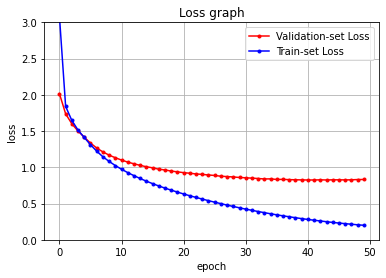

In [55]:
import matplotlib.pyplot as plt

# loss 값을 plot
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph') 
plt.ylim(0,3)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

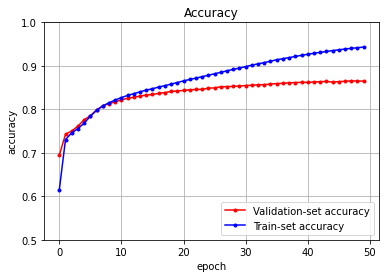

In [56]:
# accuracy 값을 plot
y_vacc = history.history['val_acc']
y_acc = history.history['acc']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Step 6. 모델 평가하기
__인코더 정의. encoder_inputs와 encoder_states는 이미 정의한 것들을 재사용__

In [57]:
encoder_model = Model(inputs = encoder_inputs, outputs = encoder_states)
encoder_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         594944    
_________________________________________________________________
masking (Masking)            (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  [(None, 128), (None, 128) 131584    
Total params: 726,528
Trainable params: 726,528
Non-trainable params: 0
_________________________________________________________________


__테스트 단계용 디코더 설계__

In [58]:
# 이전 time step의 hidden state를 저장하는 텐서
decoder_state_input_h = Input(shape=(128,))

# 이전 time step의 cell state를 저장하는 텐서
decoder_state_input_c = Input(shape=(128,))

# 이전 time step의 hidden state와 cell state를 하나의 변수에 저장
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# 훈련 때 사용했던 임베딩 층을 재사용
dec_emb2 = dec_emb_layer

# decoder_states_inputs를 현재 time step의 초기 상태로 사용
# 구체적 동작은 def decode_sequence()에 구현
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, 
                                                 initial_state = decoder_states_inputs)

# 현재 time step의 hidden state와 cell state를 하나의 변수에 저장
decoder_states2 = [state_h2, state_c2]

__디코더의 출력층을 재설계__

In [59]:
decoder_outputs2 = decoder_dense(decoder_outputs2)
decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs2] + decoder_states2)
decoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 128)    1244160     input_2[0][0]                    
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 128)]        0                                            
____________________________________________________________________________________________

In [60]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)

    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = tokenizer_fra.word_index['<sos>']

    stop_condition = False
    decoded_sentence = ""

    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이전 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 문자로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = idx2fra[sampled_token_index]

        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += sampled_char

        # <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '<eos>' or
           len(decoded_sentence) > max_fra_seq_len):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence

In [61]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
    sentence = ''
    for encoded_word in input_seq:
        if(encoded_word != 0):
            sentence = sentence + idx2eng[encoded_word] + ' '
    return sentence

# 번역문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
    sentence = ''
    for encoded_word in input_seq:
        if(encoded_word != 0 and encoded_word != fra2idx['<sos>'] and encoded_word != fra2idx['<eos>']):
            sentence = sentence + idx2fra[encoded_word] + ' '
    return sentence

In [66]:
for seq_index in [919, 800, 8000, 25000, 8]:
    input_seq = encoder_input_train[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    
    print('입력문장 :', seq_to_src(encoder_input_train[seq_index]))
    print('정답문장 :', seq_to_tar(decoder_input_train[seq_index]))
    print('번역문장 :', decoded_sentence[1:-5])
    print('-'*50)

입력문장 : i'm alone . 
정답문장 : je suis seul . 
번역문장 : esuisseule.
--------------------------------------------------
입력문장 : i am not a teacher . 
정답문장 : je ne suis pas un enseignant . 
번역문장 : enesuispasensei
--------------------------------------------------
입력문장 : i remember . 
정답문장 : je m'en souviens . 
번역문장 : emesouviens.
--------------------------------------------------
입력문장 : they all knew . 
정답문장 : ils savaient tous . 
번역문장 : lssavaientt
--------------------------------------------------
입력문장 : this is a pencil . 
정답문장 : ceci est un crayon . 
번역문장 : echienest
--------------------------------------------------


입력문장 : i'm alone .  나 혼자야 <br>
정답문장 : je suis seul . 나 혼자야<br>
번역문장 : esuisseule. 혼자입니다.<br>
--------------------------------------------------
입력문장 : i am not a teacher .   저는 교사가 아닙니다.<br>
정답문장 : je ne suis pas un enseignant .  저는 교사가 아닙니다.<br>
번역문장 : enesuispasensei 가르치지 않다<br>
--------------------------------------------------
입력문장 : i remember .        기억난다<br>
정답문장 : je m'en souviens .  기억난다<br>
번역문장 : emesouviens. 기억합니다.<br>
--------------------------------------------------
입력문장 : they all knew .     그들은 모두 알고 있었습니다.<br>
정답문장 : ils savaient tous . 그들은 모두 알고 있었습니다.<br>
번역문장 : lssavaientt 그들은 알고 있었습니다.<br>
--------------------------------------------------
입력문장 : this is a pencil .    이것은 연필입니다.<br>
정답문장 : ceci est un crayon .  이것은 연필입니다.<br>
번역문장 : echienest 동쪽의 개<br>
--------------------------------------------------

In [68]:
for seq_index in [3, 50, 100, 300, 1001]:
    input_seq = encoder_input_test[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)

    print("입력문장 :",seq_to_src(encoder_input_test[seq_index]))
    print("정답문장 :",seq_to_tar(decoder_input_test[seq_index]))
    print("번역문장 :",decoded_sentence[1:-5])
    print("-"*50)

입력문장 : their eyes met . 
정답문장 : leurs regards se croisèrent . 
번역문장 : eshommesdevr
--------------------------------------------------
입력문장 : come near the fire . 
정답문장 : approche-toi du feu . 
번역문장 : iensviteàfra
--------------------------------------------------
입력문장 : it's a fad . 
정답문장 : c'est un phénomène de mode . 
번역문장 : 'estuneto
--------------------------------------------------
입력문장 : the storm let up . 
정답문장 : la tempête s'est calmée . 
번역문장 : epuitsest
--------------------------------------------------
입력문장 : they're after you . 
정답문장 : ils sont après vous . 
번역문장 : llessontenséc
--------------------------------------------------
